In [60]:
#import needed library
import numpy as np
import cv2
import os
import random
from matplotlib import pyplot as plt
from skimage.util import random_noise
from scipy.signal import gaussian, convolve2d
%matplotlib inline

In [61]:
#show image
def show(img):
    plt.imshow(img, cmap='gray')
    plt.xticks([])
    plt.yticks([])

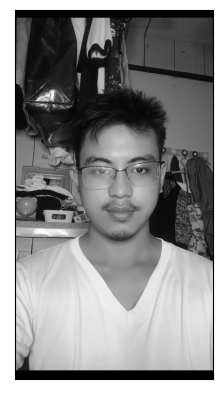

In [62]:
#converting image to grayscale
img_original = cv2.imread('flat2.png', 0)
h, w = img_original.shape
img = np.zeros((h+160,w), np.uint8)
img[80:-80,:] = img_original
cv2.imwrite('orig.jpg', img)
show(img)

In [63]:
#crop the image
crop_gray_img = img[1250:2050, 550:1350]
cv2.imwrite('crop_gray_img.jpg', crop_gray_img) #saving the crop image

True

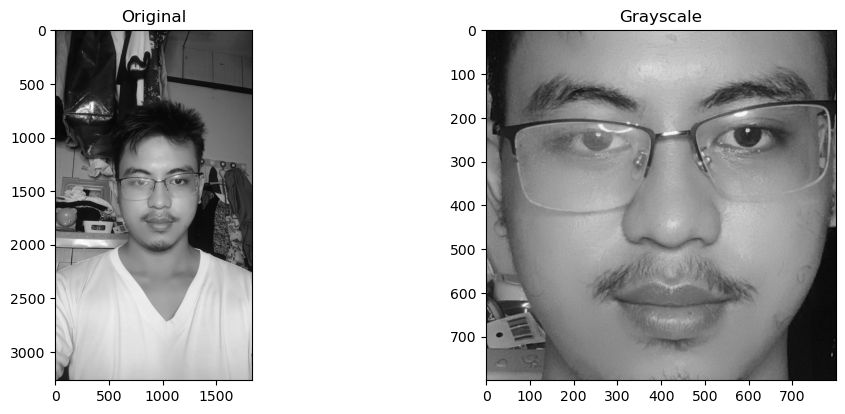

In [64]:
#read the crop image.
gray = cv2.imread('crop_gray_img.jpg',0) #reading the saved imagez

display = [img_original, gray]
label = ['Original', 'Grayscale']
    
fig = plt.figure(figsize=(12,10))
for i in range(len(display)):
    fig.add_subplot(2,2,i+1)
    plt.imshow(display[i], cmap = 'gray')
    plt.title(label[i])
plt.show()

# Gaussian Noise

In [65]:
#Gaussian Noise
#You can add more gaussian noise by changing the std (standard deviation) to add more noise to image.
def add_gaussian_noise(image, mean=0, std=20):
    gaus_noise = np.random.normal(mean, std, image.shape)
    image = image.astype("int16")
    noise_img = image + gaus_noise
    return noise_img 

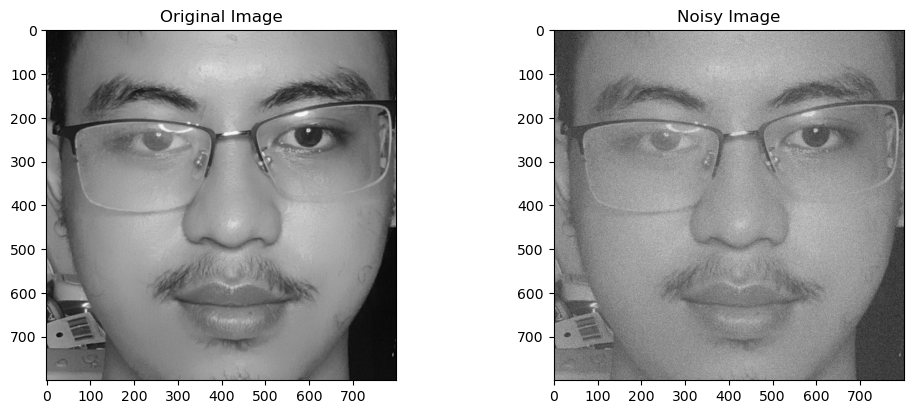

In [66]:
#applying noise to image
noisy_img = add_gaussian_noise(gray)

#display original image and noisy image.
display = [gray, noisy_img]
label = ['Original Image', 'Noisy Image']
fig = plt.figure(figsize=(12,10))
for i in range(len(display)):
    fig.add_subplot(2,2,i+1)
    plt.imshow(display[i], cmap = 'gray')
    plt.title(label[i])
plt.show()

# Speckle Noise

In [67]:
#Speckle Noise
def sp_noise(image, prob):
    output = np.zeros(image.shape)
    thres = 1 - prob
    for i in range(image.shape[0]):
        for j in range (image.shape[1]):
            rdn = random.random()
            if rdn < prob:
                output[i][j]=128
                for k in range (5):
                    output[i-k][j-k] - 128 + 10*rdn
            else:
                output[i][j] - image[i][j]
    noisy = output + image
    return noisy

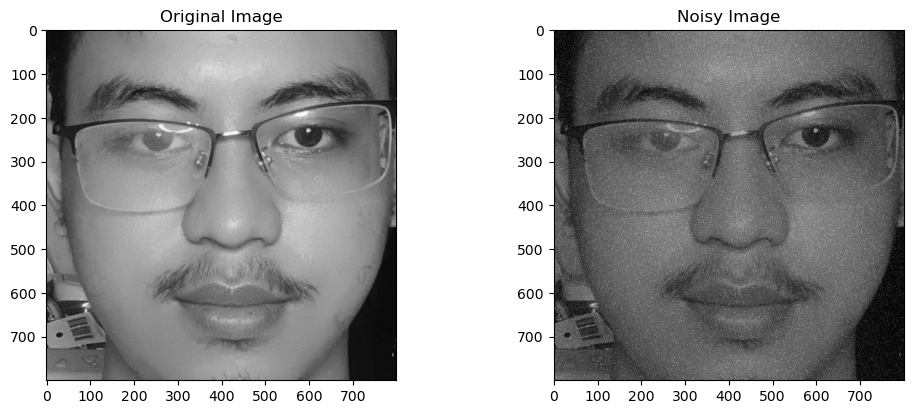

In [68]:
#applying noise to image
#you can add more noise by increasing the prob parameter.
noisy_img = sp_noise(gray, 0.07)

#display original image and noisy image.
display = [gray, noisy_img]
label = ['Original Image', 'Noisy Image']
fig = plt.figure(figsize=(12,10))
for i in range(len(display)):
    fig.add_subplot(2,2,i+1)
    plt.imshow(display[i], cmap = 'gray')
    plt.title(label[i])
plt.show()

# Salt and Pepper

In [69]:
#Salt and Pepper Noise
def adding_salt_pepper(img):
    rw, cl= img.shape
    num_pixls= random.randint(5000,5000) #increase the value if you want more noise.
    for i in range (num_pixls):
        y_crd=random.randint(0,rw-1)
        x_crd=random.randint(0,cl-1)
        img[y_crd][x_crd]=255
    for i in range(num_pixls):
        y_crd=random.randint(0,rw-1)
        x_crd=random.randint(0,cl-1)
        img[y_crd][x_crd]=0
    return img

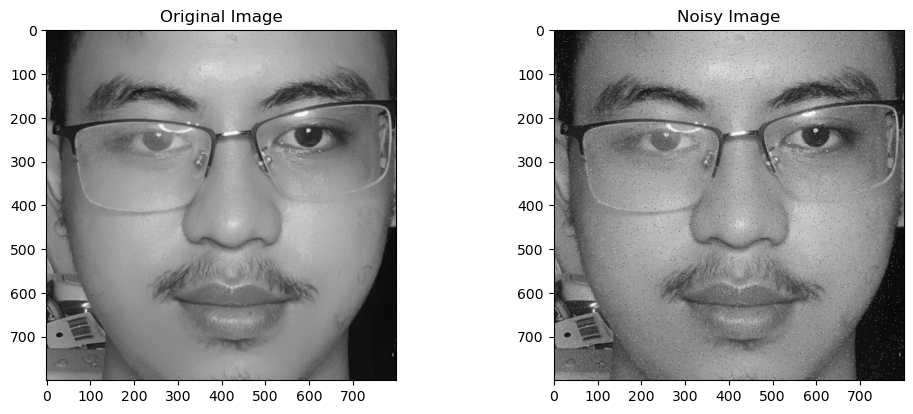

In [70]:
#applying noise to image
orig = cv2.imread('crop_gray_img.jpg',0)
noisy_img = adding_salt_pepper(gray)

#display original image and noisy image.
display = [orig, noisy_img]
label = ['Original Image', 'Noisy Image']
fig = plt.figure(figsize=(12,10))
for i in range(len(display)):
    fig.add_subplot(2,2,i+1)
    plt.imshow(display[i], cmap = 'gray')
    plt.title(label[i])
plt.show()

# Poisson Noise

In [71]:
#Poisson Noise
def add_poisson_noise(img):
    mean = np.mean(gray) #you can do this or choose any value to change the density of the noise.
    noise = np.random.poisson(mean, size = gray.shape)
    scaled_noise = np.sqrt(mean) * noise
    noisy_img = gray + scaled_noise
    return noisy_img

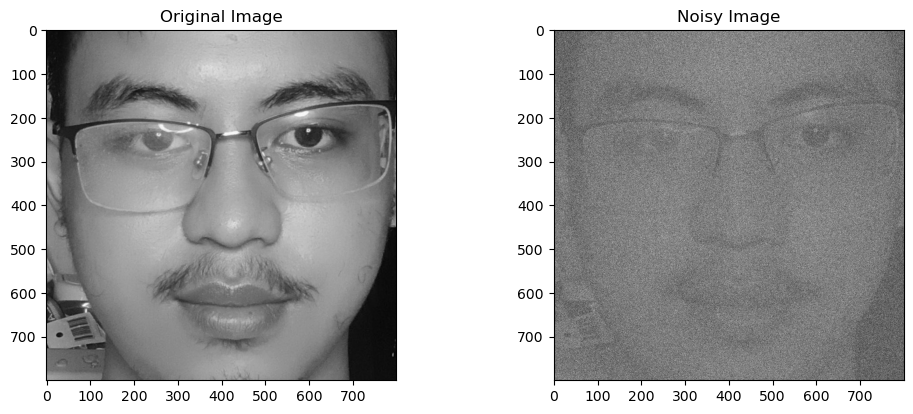

In [72]:
#applying noise to image
noisy_img = add_poisson_noise(gray)

#display original image and noisy image.
display = [orig, noisy_img]
label = ['Original Image', 'Noisy Image']
fig = plt.figure(figsize=(12,10))
for i in range(len(display)):
    fig.add_subplot(2,2,i+1)
    plt.imshow(display[i], cmap = 'gray')
    plt.title(label[i])
plt.show()

# Blur

In [73]:
#Blur
def gaussian_blur(img):
    source = cv2.GaussianBlur(img, (9,9), 20) #add more value if you want to increase the blurry effect.
    return source

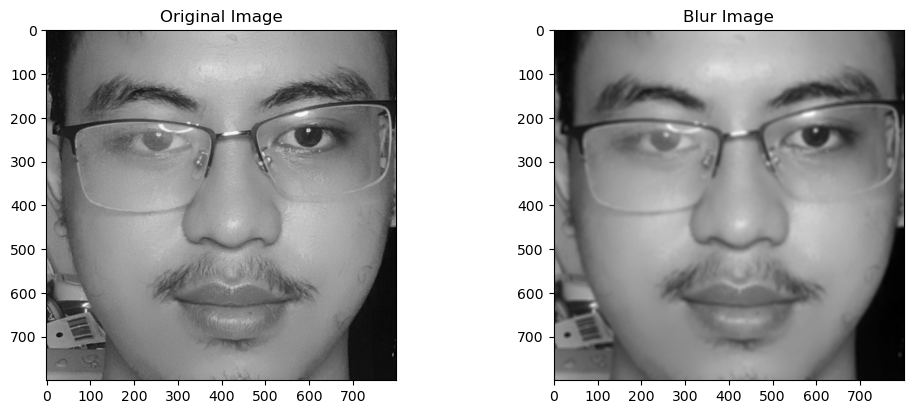

In [74]:
#applying blur
blur_img = gaussian_blur(orig)

#display original image and blur image.
display = [orig, blur_img]
label = ['Original Image', 'Blur Image']
fig = plt.figure(figsize=(12,10))
for i in range(len(display)):
    fig.add_subplot(2,2,i+1)
    plt.imshow(display[i], cmap = 'gray')
    plt.title(label[i])
plt.show()

# Motion Blur

In [77]:
#Motion Blur
#add more value to kernel_size if you want to increase the motion blur effect.
def motion_blur(img, kernel_size = 30):
	dummy = np.copy(img)
	h = np.eye(kernel_size) / kernel_size
	dummy = convolve2d(dummy, h, mode = 'valid')
	return dummy

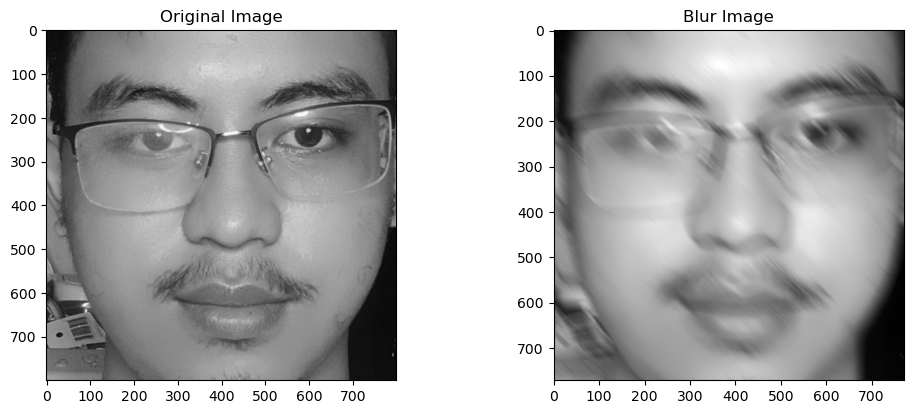

In [78]:
#applying blur
blur_img = motion_blur(orig)

#display original image and blur image.
display = [orig, blur_img]
label = ['Original Image', 'Blur Image']
fig = plt.figure(figsize=(12,10))
for i in range(len(display)):
    fig.add_subplot(2,2,i+1)
    plt.imshow(display[i], cmap = 'gray')
    plt.title(label[i])
plt.show()